In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#### Data

I chose the consumer behaviour and shopping habits dataset from kaggle. 
URL: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset



#### Dataset Description

The Consumer Behavior and Shopping Habits Dataset is a robust collection of consumer information crucial for market analysis and tailored marketing strategies. It covers Customer IDs for identification, Age and Gender for demographics, and Purchase Amount in USD for transaction value. Details like Item Purchased, Category, and Location provide insights into product preferences and regional trends. Size, Color, and Season data cater to specific consumer choices.

#### Data exploration

In [5]:
# data import
# in the folder from the website there were two similar datasets

df = pd.read_csv(r"D:\shopping_trends.csv") 

In [6]:
print(df.shape)

(3900, 19)


In [7]:
print(df.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [9]:
df.Category

0          Clothing
1          Clothing
2          Clothing
3          Footwear
4          Clothing
           ...     
3895       Clothing
3896    Accessories
3897    Accessories
3898       Footwear
3899    Accessories
Name: Category, Length: 3900, dtype: object

In [10]:
df.describe

<bound method NDFrame.describe of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2          


## Data Understanding: Data Description Report presenting

#### a. Attribute Types:

The dataset consists of **19 columns** with mixed data types:

- **Numerical Columns** (4 columns):
  - **Age** (int64): The age of the customer, providing demographic information for segmentation and targeted marketing strategies.
  - **Purchase Amount (USD)** (int64): The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).
  - **Review Rating** (float64): A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.
  - **Previous Purchases** (int64): Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

- **Categorical Columns** (14 columns):
  - **Gender** (object): The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.
  - **Item Purchased** (object): The specific product or item selected by the customer during the transaction.
  - **Category** (object): The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).
  - **Location** (object): The geographical location where the purchase was made, offering insights into regional preferences and market trends.
  - **Size** (object): The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.
  - **Color** (object): The color variant or choice associated with the purchased item, influencing customer preferences and product availability.
  - **Season** (object): The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.
  - **Subscription Status** (object): Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.
  - **Payment Method** (object): Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.
  - **Shipping Type** (object): Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.
  - **Discount Applied** (object): Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.
  - **Promo Code Used** (object): Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.
  - **Preferred Payment Method** (object): The customer's preferred method of payment.
  - **Frequency of Purchases** (object): Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

- **Identifier Column** (1 column):
  - **Customer ID** (int64): A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

#### b. Statistical properties describing the dataset including correlations

In [14]:
summary = df.describe()
summary
#summary.to_excel('summary_statistics.xlsx')

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [15]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


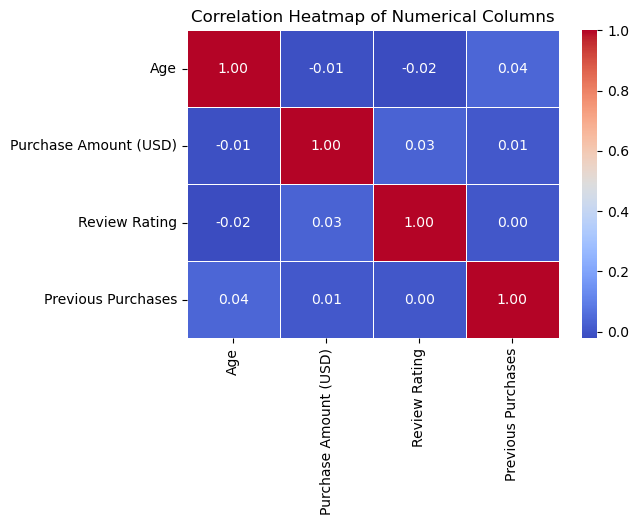

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

The Age of the customers shows little to no impact on their spending behavior or review ratings, and it has a weak positive correlation with previous purchases.
Purchase Amount (USD) and Review Rating show a slight positive correlation, suggesting that higher spenders might rate products slightly higher, but this correlation is very weak.
The Previous Purchases metric does not strongly correlate with the Purchase Amount or Review Rating, implying that customers with more purchases don't necessarily spend more or give higher ratings.

In [18]:
categorical_columns = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 
    'Color', 'Season', 'Subscription Status', 'Payment Method', 
    'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases'
]

# Create frequency tables for categorical columns
for column in categorical_columns:
    print(f"Frequency table for {column}:")
    print(df[column].value_counts())
    print("\n" + "="*40 + "\n")

Frequency table for Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


Frequency table for Item Purchased:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


Frequency table for Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Frequency table for Location:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Mar

#### C. Data quality aspects

In [20]:
missing_values = df.isnull().sum()
print("Missing Values Summary:")
print(missing_values[missing_values > 0])


Missing Values Summary:
Series([], dtype: int64)


There are no missing values in the dataset.

In [22]:
# Distritubtion of categorical attributes
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)
    print(f"\nDistribution of {col}:")
    print(value_counts)


Distribution of Gender:
Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

Distribution of Item Purchased:
Item Purchased
Blouse        0.043846
Jewelry       0.043846
Pants         0.043846
Shirt         0.043333
Dress         0.042564
Sweater       0.042051
Jacket        0.041795
Belt          0.041282
Sunglasses    0.041282
Coat          0.041282
Sandals       0.041026
Socks         0.040769
Skirt         0.040513
Shorts        0.040256
Scarf         0.040256
Hat           0.039487
Handbag       0.039231
Hoodie        0.038718
Shoes         0.038462
T-shirt       0.037692
Sneakers      0.037179
Boots         0.036923
Backpack      0.036667
Gloves        0.035897
Jeans         0.031795
Name: proportion, dtype: float64

Distribution of Category:
Category
Clothing       0.445385
Accessories    0.317949
Footwear       0.153590
Outerwear      0.083077
Name: proportion, dtype: float64

Distribution of Location:
Location
Montana           0.024615
California        0.0

Some categorical features in the dataset exhibit uneven distributions that can cause potential issues:
- The dataset is skewed towards male customers with 68% male and 32% female.
- Some categories in the Items column (like Jeans) have notably lower representation (3.18%)
- In the Category column Outerwear category is underrepresented
- There is a strong skew towards non-subscribed customers (73% subscribed)
- The majority category from size is from M (45%) but it is rather expected

In [24]:
# Plausibility Checks for Numerical Columns
# Age: Typically between 0 and 100
invalid_age_count = df[(df['Age'] < 0) | (df['Age'] > 100)].shape[0]

# Review Rating: Should be between 0 and 5
invalid_review_count = df[(df['Review Rating'] < 0) | (df['Review Rating'] > 5)].shape[0]

print(f"Number of invalid age entries: {invalid_age_count}")
print(f"Number of invalid review rating entries: {invalid_review_count}")


Number of invalid age entries: 0
Number of invalid review rating entries: 0


In [25]:
# Outlier Detection using IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

age_outliers = detect_outliers(df, 'Age')
purchase_amount_outliers = detect_outliers(df, 'Purchase Amount (USD)')
review_rating_outliers = detect_outliers(df, 'Review Rating')
previous_purchases_outliers = detect_outliers(df, 'Previous Purchases')

print(f"Number of outliers in Age: {len(age_outliers)}")
print(f"Number of outliers in Purchase Amount (USD): {len(purchase_amount_outliers)}")
print(f"Number of outliers in Review Rating: {len(review_rating_outliers)}")
print(f"Number of outliers in Previous Purchases: {len(previous_purchases_outliers)}")


Number of outliers in Age: 0
Number of outliers in Purchase Amount (USD): 0
Number of outliers in Review Rating: 0
Number of outliers in Previous Purchases: 0


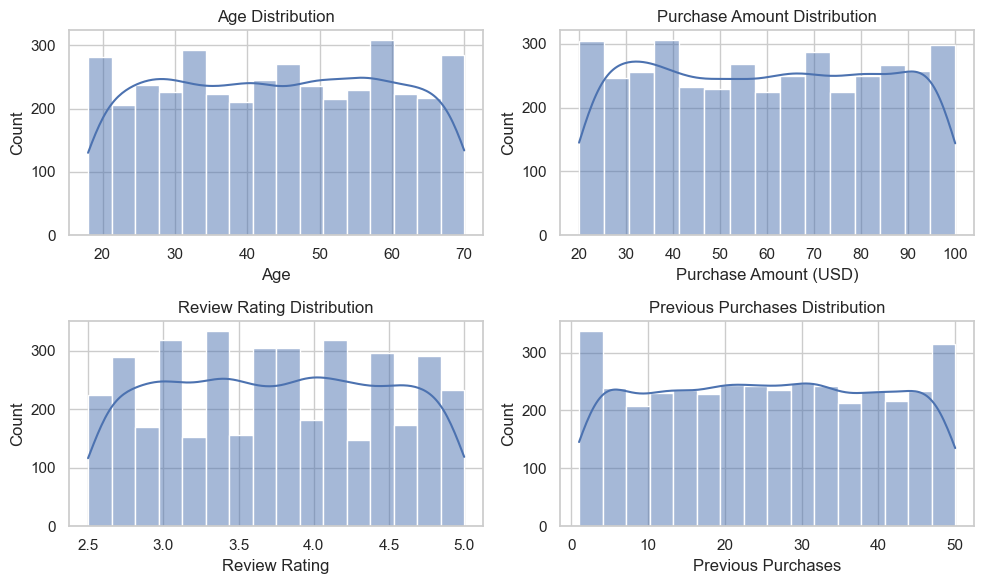

In [26]:
sns.set(style="whitegrid")
# Distribution of Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(data=df, x='Purchase Amount (USD)', kde=True, ax=axes[0, 1]).set_title('Purchase Amount Distribution')
sns.histplot(data=df, x='Review Rating', kde=True, ax=axes[1, 0]).set_title('Review Rating Distribution')
sns.histplot(data=df, x='Previous Purchases', kde=True, ax=axes[1, 1]).set_title('Previous Purchases Distribution')
plt.tight_layout()
plt.show()

We can see that Age, and Purchase amount are rather equally distributed. In Review ratings and Previous Purchases we have some higher number of instances but not considered as outliers

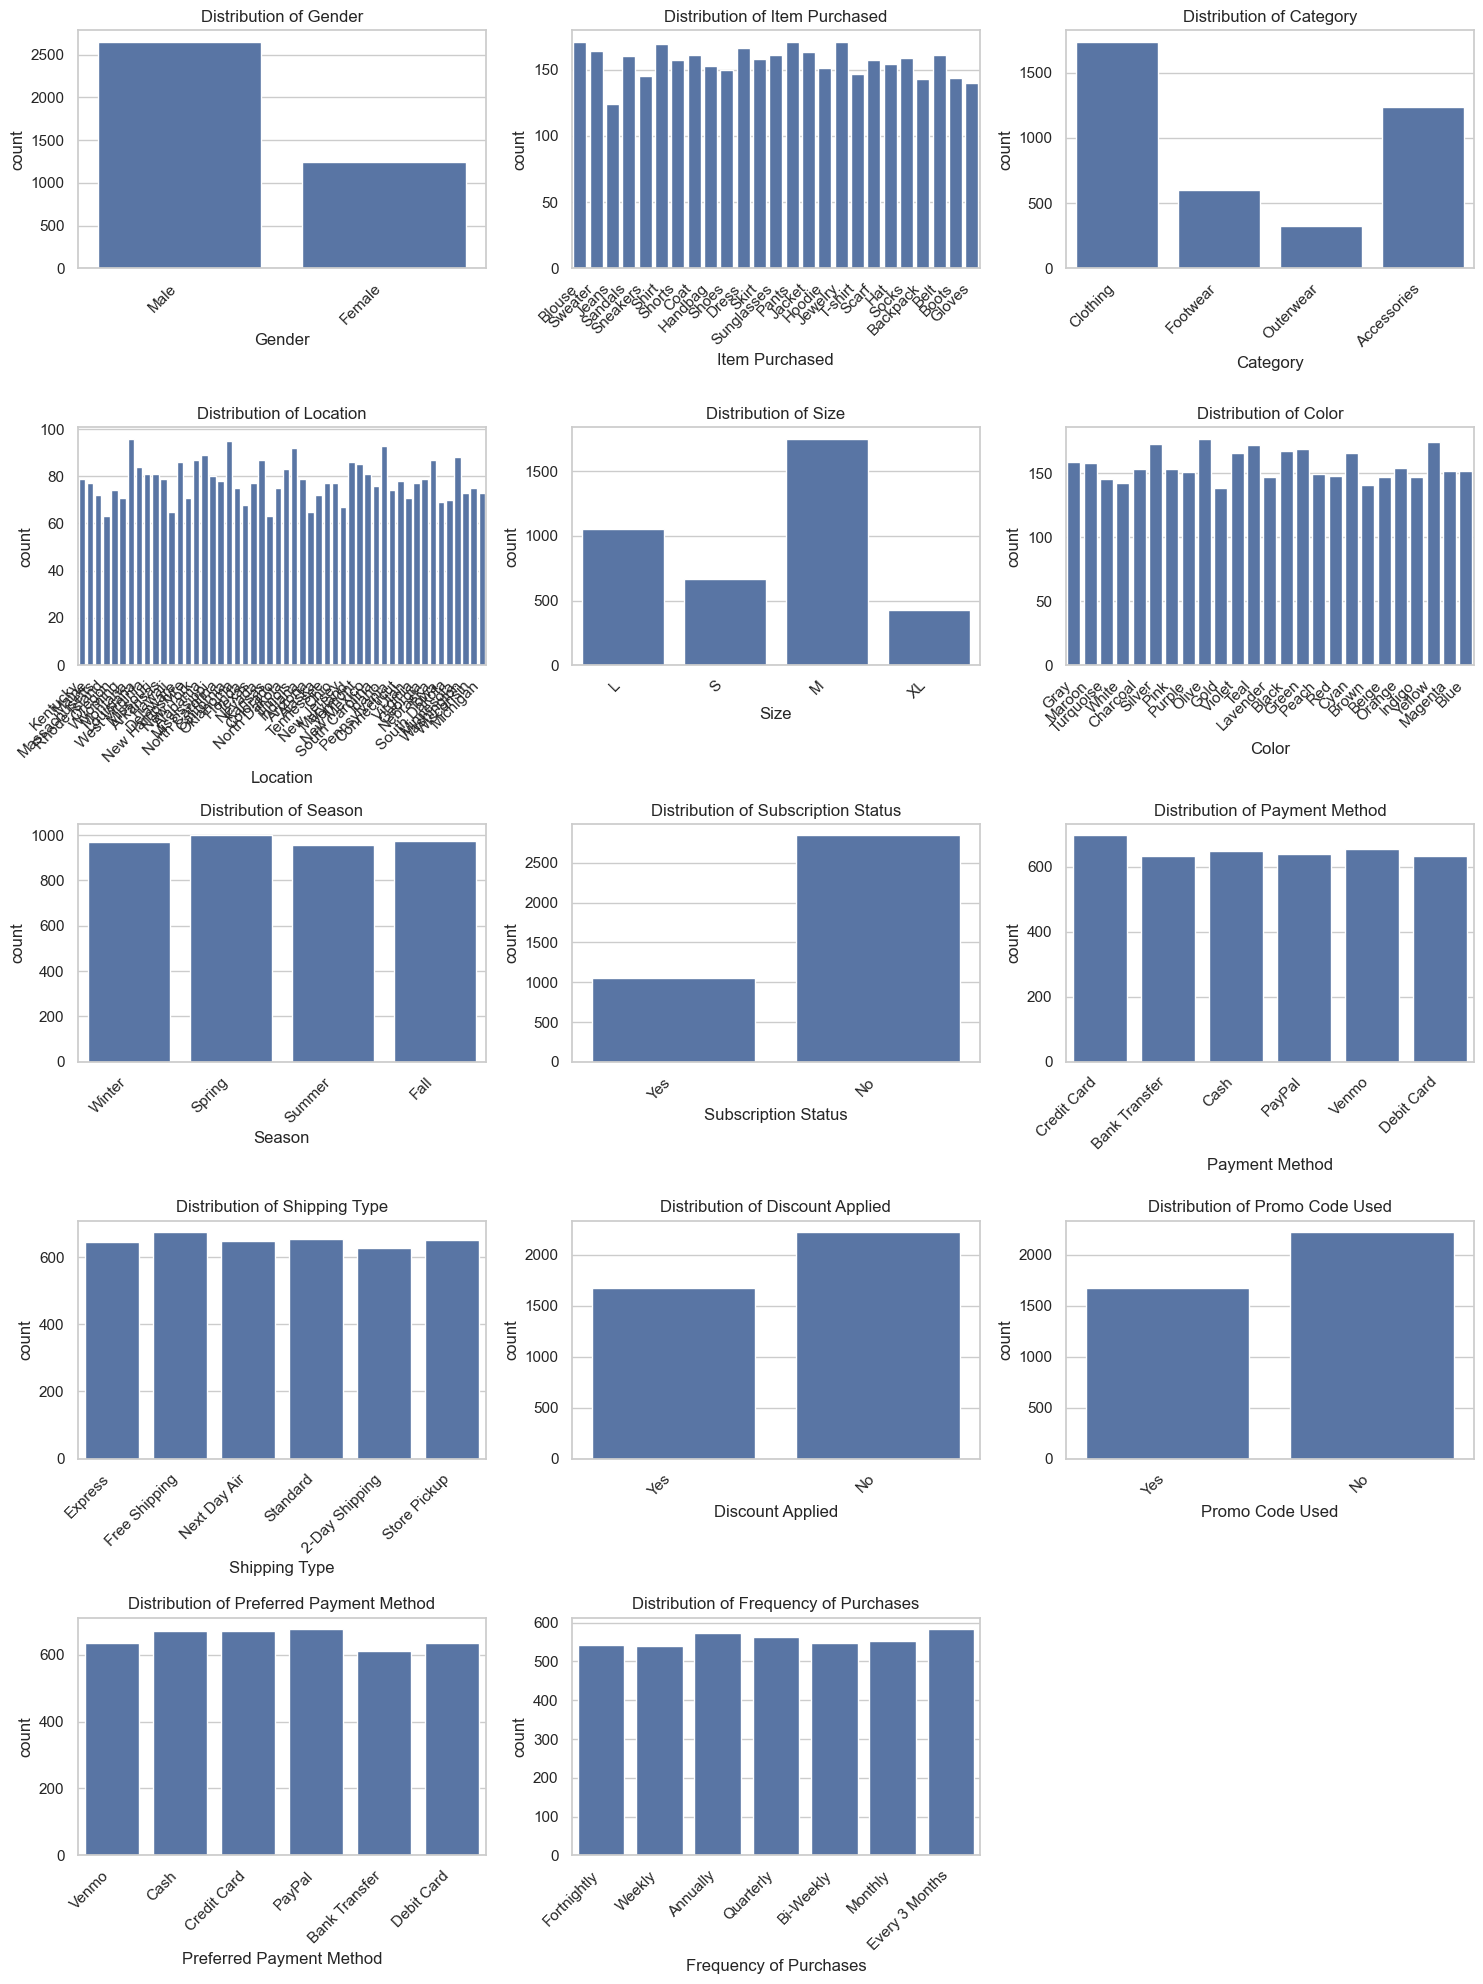

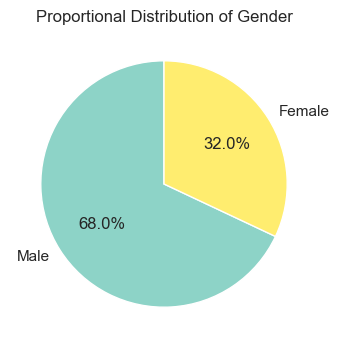

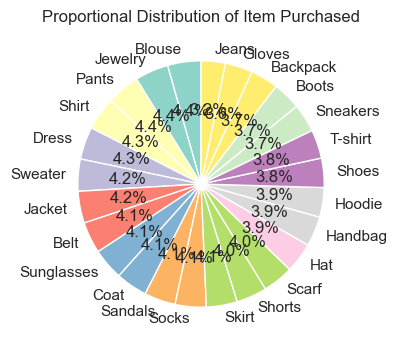

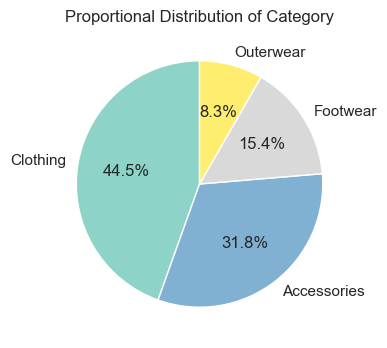

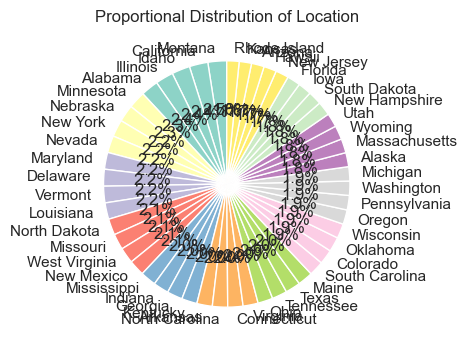

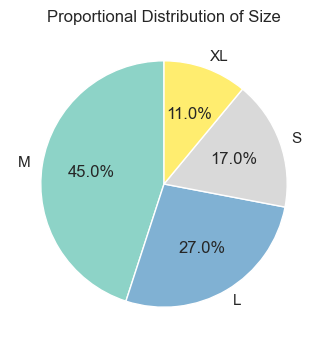

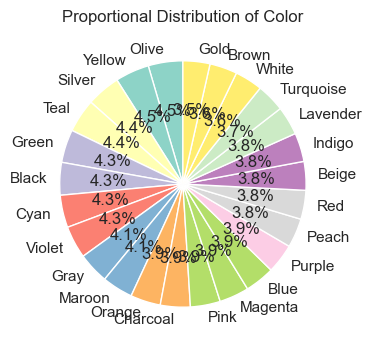

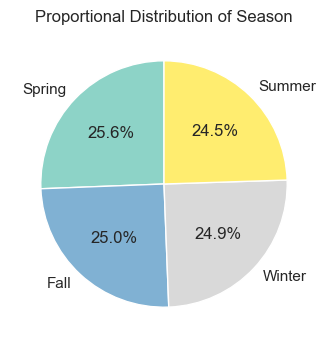

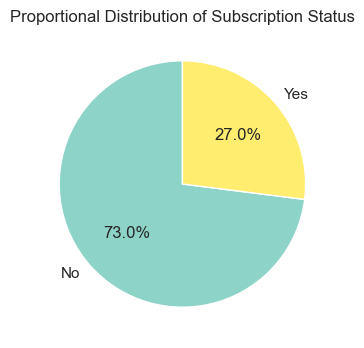

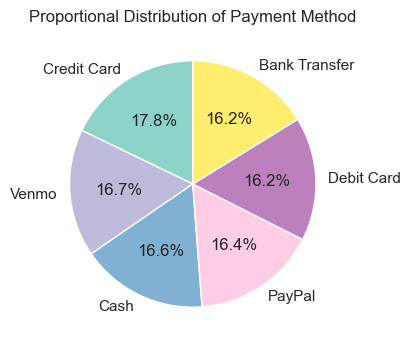

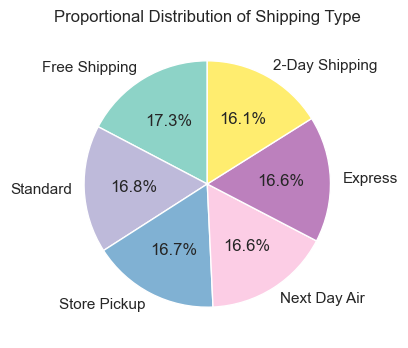

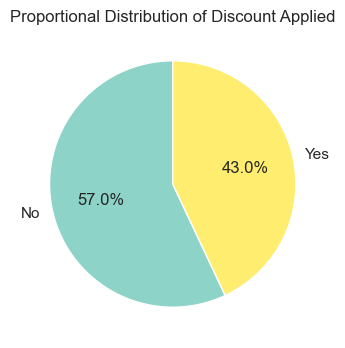

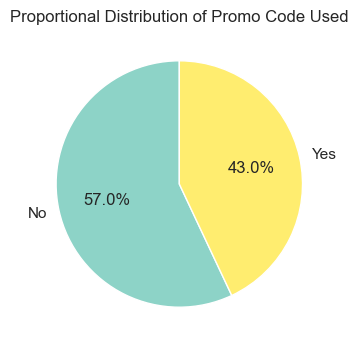

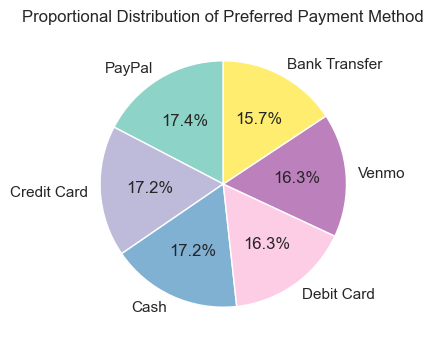

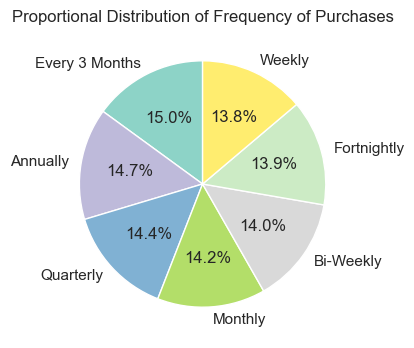

In [28]:
categorical_columns = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
    'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 
    'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 
    'Frequency of Purchases'
]

plt.figure(figsize=(15, 20))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

for column in categorical_columns[:14]: 
    plt.figure(figsize=(4, 4))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
    plt.title(f'Proportional Distribution of {column}')
    plt.ylabel('')  
    plt.show()

There are notable uneven distribution in categorical features: Gender,Category, Size, Subscription Status. Unequal Gender distribution can be problematic 

#### d. Visual exploration of data properties and hypotheses

Based on my data mining goals I want to find some interesting visualizations to help me narrow down further my objectives and get more insights from the data

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\2106980454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='coolwarm')


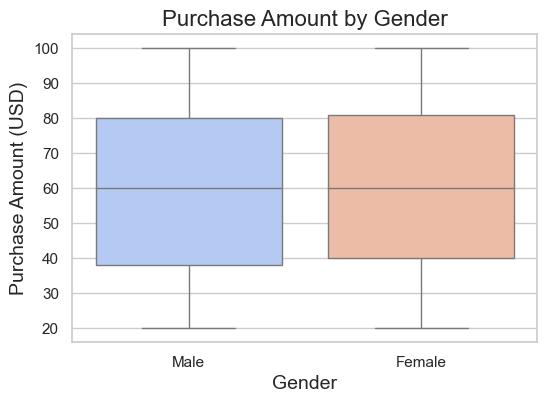

In [31]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='coolwarm')
plt.title('Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\3754941211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette='Set2')


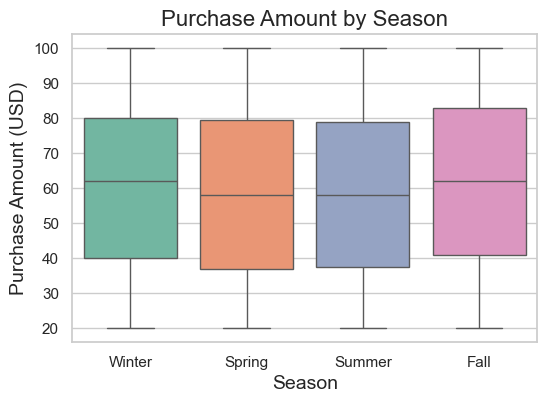

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Purchase Amount by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.show()

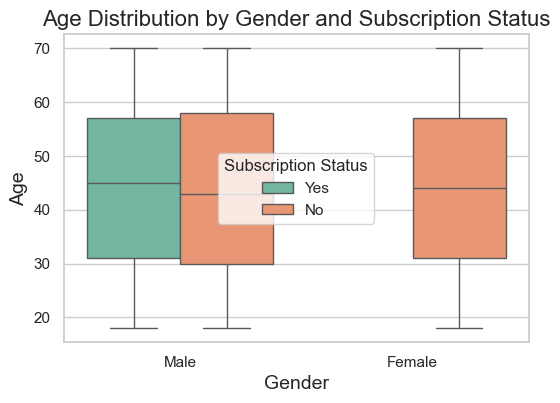

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4
                ))
sns.boxplot(x='Gender', y='Age', hue='Subscription Status', data=df, palette='Set2')
plt.title('Age Distribution by Gender and Subscription Status', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

It is interesting to see that neither of the female customers are subscribed. This can be a major concern for a business point of view

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\667120895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item Purchased', y='Purchase Amount (USD)', data=df, palette='Set3')


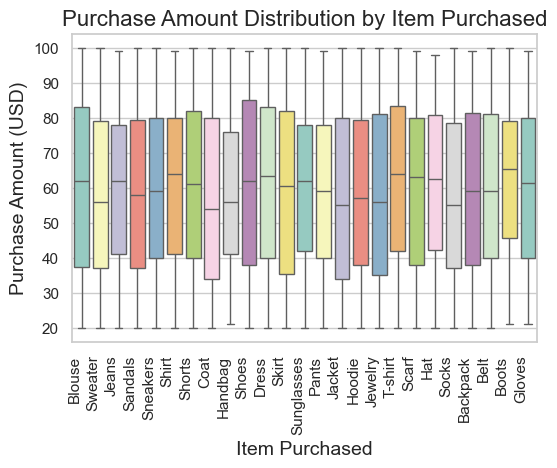

In [35]:
sns.set(style="whitegrid") 
plt.figure(figsize=(6, 4))
sns.boxplot(x='Item Purchased', y='Purchase Amount (USD)', data=df, palette='Set3')
plt.title('Purchase Amount Distribution by Item Purchased', fontsize=16)
plt.xlabel('Item Purchased', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=90, ha="right")
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\2348539471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, palette='Set3')


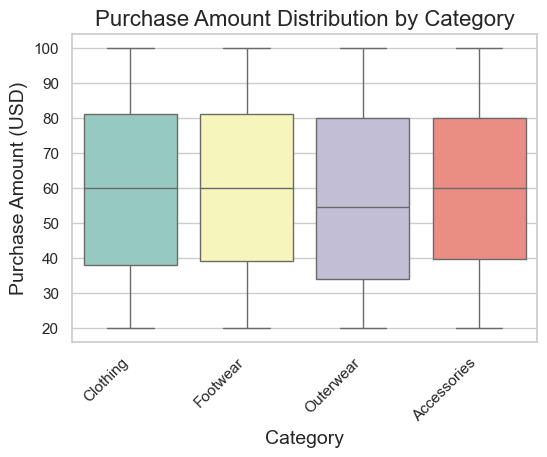

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, palette='Set3')
plt.title('Purchase Amount Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\3761459997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Review Rating', data=df, palette='Set3')


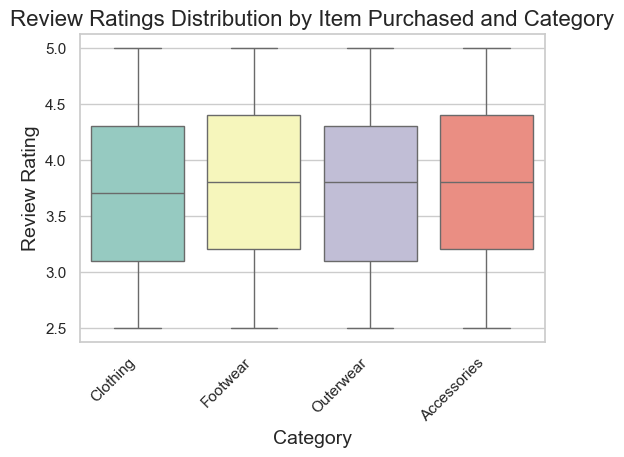

In [37]:
sns.set(style="whitegrid")
plt.figure(figsize=(6  , 4))
sns.boxplot(x='Category', y='Review Rating', data=df, palette='Set3')
plt.title('Review Ratings Distribution by Item Purchased and Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Review Rating', fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\596592854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription Status', y='Review Rating', data=df, palette='Set3')


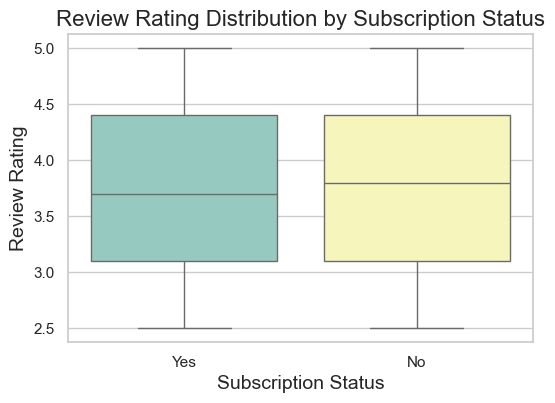

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.boxplot(x='Subscription Status', y='Review Rating', data=df, palette='Set3')
plt.title('Review Rating Distribution by Subscription Status', fontsize=16)
plt.xlabel('Subscription Status', fontsize=14)
plt.ylabel('Review Rating', fontsize=14)
plt.show()

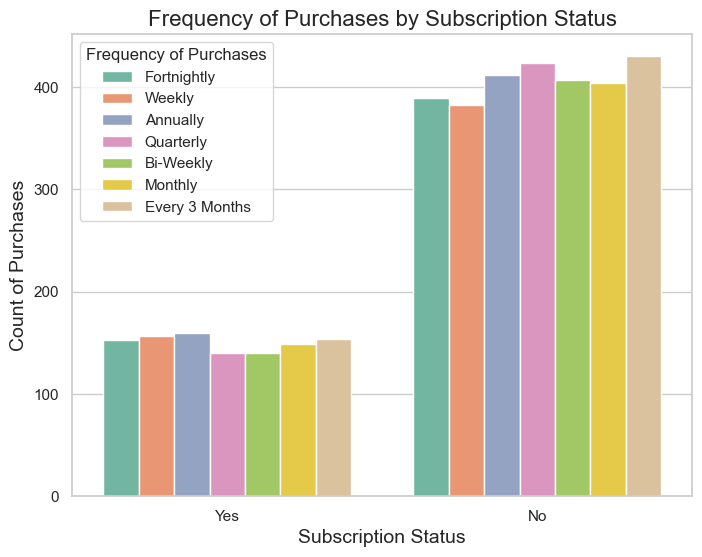

In [39]:
# I use pie charts instead of this bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Subscription Status', hue='Frequency of Purchases', data=df, palette='Set2')
plt.title('Frequency of Purchases by Subscription Status', fontsize=16)
plt.xlabel('Subscription Status', fontsize=14)
plt.ylabel('Count of Purchases', fontsize=14)
plt.show()

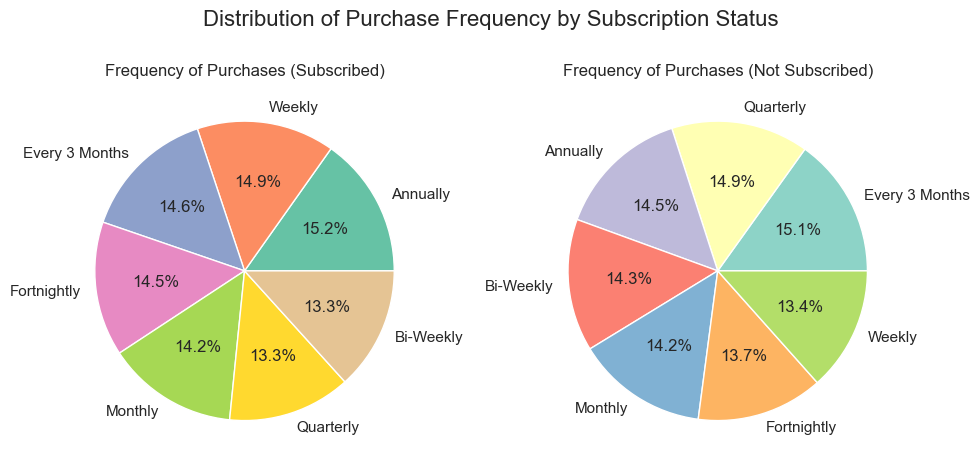

In [40]:
subscribed_data = df[df['Subscription Status'] == 'Yes']['Frequency of Purchases'].value_counts()
not_subscribed_data = df[df['Subscription Status'] == 'No']['Frequency of Purchases'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(subscribed_data, labels=subscribed_data.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
axes[0].set_title("Frequency of Purchases (Subscribed)")

axes[1].pie(not_subscribed_data, labels=not_subscribed_data.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
axes[1].set_title("Frequency of Purchases (Not Subscribed)")

plt.suptitle("Distribution of Purchase Frequency by Subscription Status", fontsize=16)
plt.tight_layout()
plt.show()

The graph shows significant difference of purchase frequencies when the customer is subscriped. Therefore it would be interesting to analyze how could the number of subscribed customers increased (i.e. what motivates a customer to subscribe or to unsubscribe)

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\763284398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df, palette='Set3')


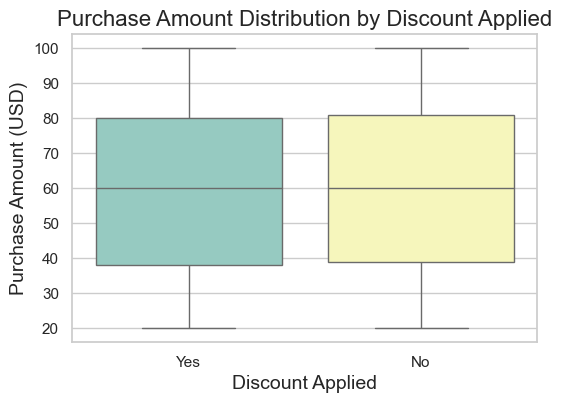

In [42]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df, palette='Set3')
plt.title('Purchase Amount Distribution by Discount Applied', fontsize=16)
plt.xlabel('Discount Applied', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\2493277868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=df, palette='Set2')


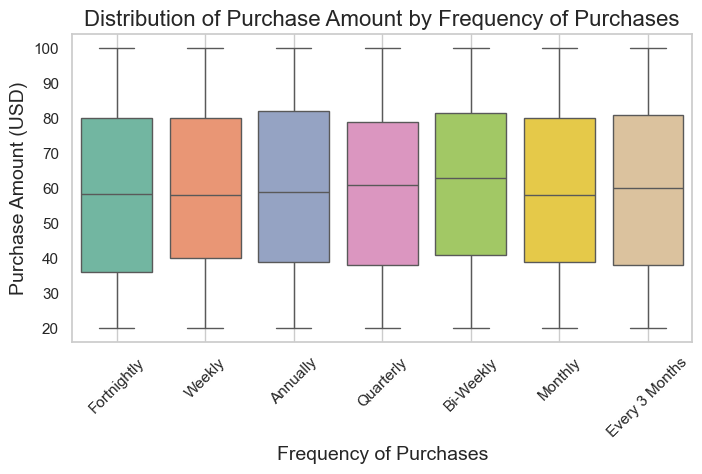

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title("Distribution of Purchase Amount by Frequency of Purchases", fontsize=16)
plt.xlabel("Frequency of Purchases", fontsize=14)
plt.ylabel("Purchase Amount (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\3774079313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Preferred Payment Method', y='Review Rating', data=df, palette='Set2')


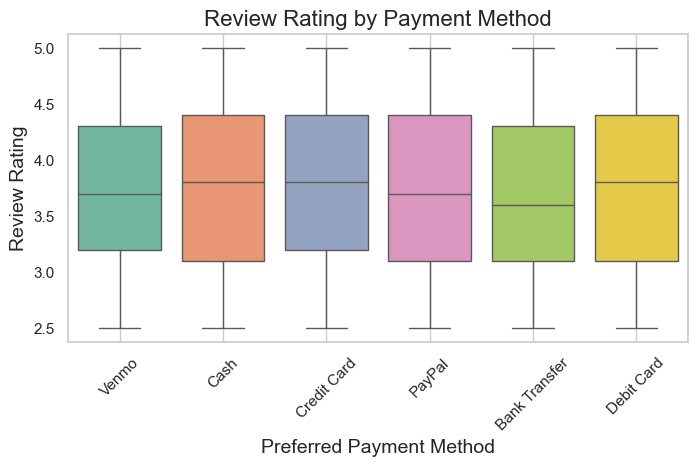

In [44]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Preferred Payment Method', y='Review Rating', data=df, palette='Set2')
plt.title("Review Rating by Payment Method", fontsize=16)
plt.xlabel("Preferred Payment Method", fontsize=14)
plt.ylabel("Review Rating", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\1409255430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipping Type', y='Review Rating', data=df, palette='Set1')


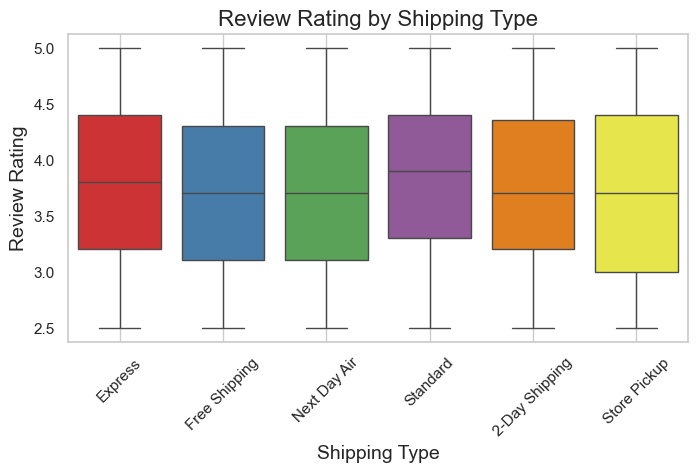

In [45]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Shipping Type', y='Review Rating', data=df, palette='Set1')
plt.title("Review Rating by Shipping Type", fontsize=16)
plt.xlabel("Shipping Type", fontsize=14)
plt.ylabel("Review Rating", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

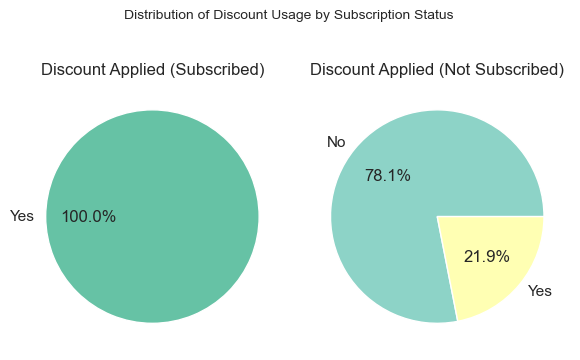

In [46]:
subscribed_data = df[df['Subscription Status'] == 'Yes']['Discount Applied'].value_counts()
not_subscribed_data = df[df['Subscription Status'] == 'No']['Discount Applied'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

axes[0].pie(subscribed_data, labels=subscribed_data.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
axes[0].set_title("Discount Applied (Subscribed)")

axes[1].pie(not_subscribed_data, labels=not_subscribed_data.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
axes[1].set_title("Discount Applied (Not Subscribed)")

plt.suptitle("Distribution of Discount Usage by Subscription Status", fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\1359450349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette='Set2')


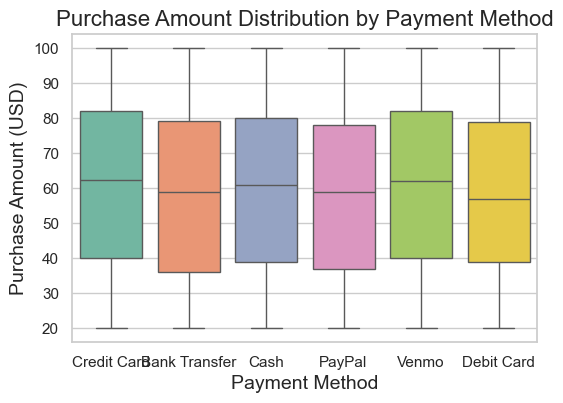

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title('Purchase Amount Distribution by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=14)
plt.show()

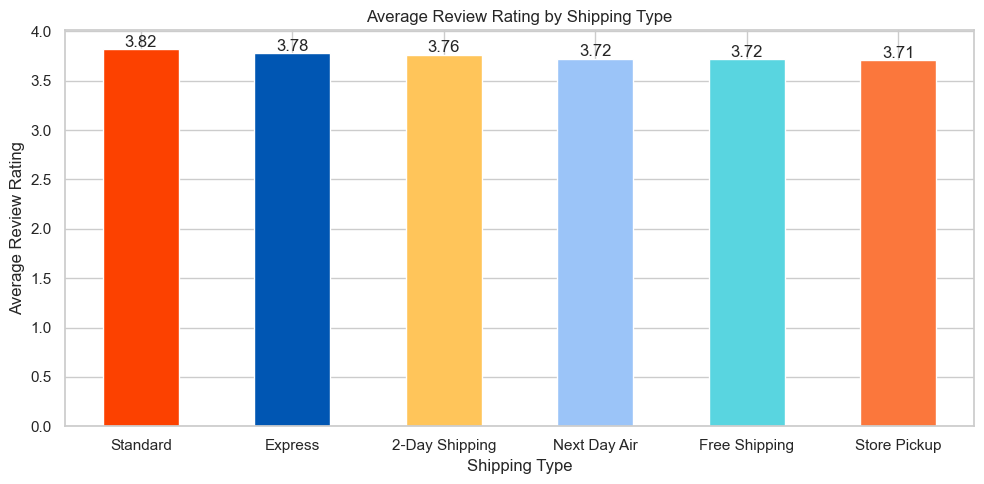

In [48]:
# Average Rating Vs Shipping Type
rating_purchase_analysis = df.groupby(['Shipping Type'])['Review Rating'].mean().sort_values(ascending=False)
colors = ['#FC4100', '#0056B3', '#FFC55A', '#9BC4F8', '#59D5E0', '#FB773C']

bars = rating_purchase_analysis.plot(kind='bar', color=colors, figsize=(10, 5))
plt.title('Average Review Rating by Shipping Type')
plt.xlabel('Shipping Type')
plt.xticks(rotation=0)
plt.ylabel('Average Review Rating')

for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.2f}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points',
                  rotation=0)

plt.tight_layout()
plt.show()

C:\Users\W11\AppData\Local\Temp\ipykernel_15184\743631905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df, palette='Set3')


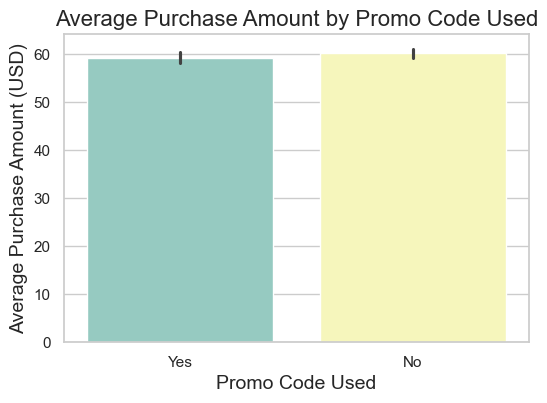

In [49]:
plt.figure(figsize=(6,4))
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df, palette='Set3')
plt.title('Average Purchase Amount by Promo Code Used', fontsize=16)
plt.xlabel('Promo Code Used', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=14)
plt.show()

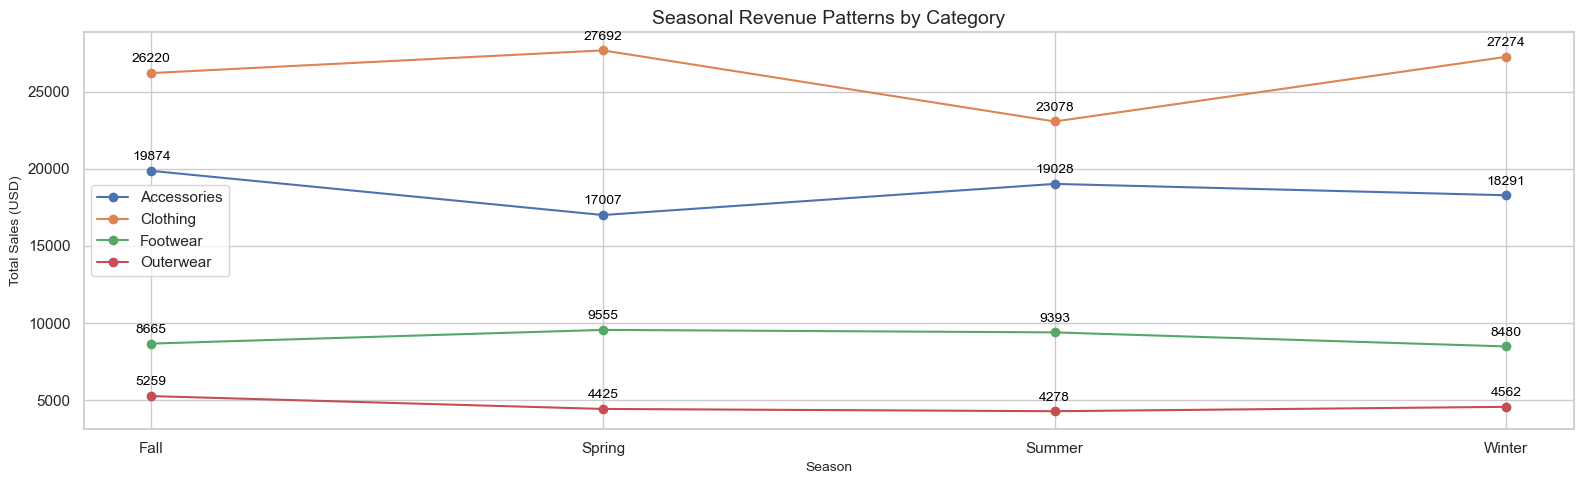

In [50]:
seasonal_data = df.groupby(['Season', 'Category']).agg({
    'Purchase Amount (USD)': 'sum',
    'Item Purchased': 'count'
}).reset_index()

plt.figure(figsize=(16, 5))
plt.title('Seasonal Revenue Patterns by Category', fontsize=14)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Total Sales (USD)', fontsize=10)

for category in seasonal_data['Category'].unique():
    season_subset = seasonal_data[seasonal_data['Category'] == category]
    plt.plot(season_subset['Season'], season_subset['Purchase Amount (USD)'], label=category, marker='o')

    for i in range(len(season_subset)):
        plt.text(season_subset['Season'].iloc[i], 
                 season_subset['Purchase Amount (USD)'].iloc[i] + 500, 
                 str(season_subset['Purchase Amount (USD)'].iloc[i]), 
                 fontsize=10, 
                 ha='center', 
                 va='bottom', 
                 color='black')

plt.legend()
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

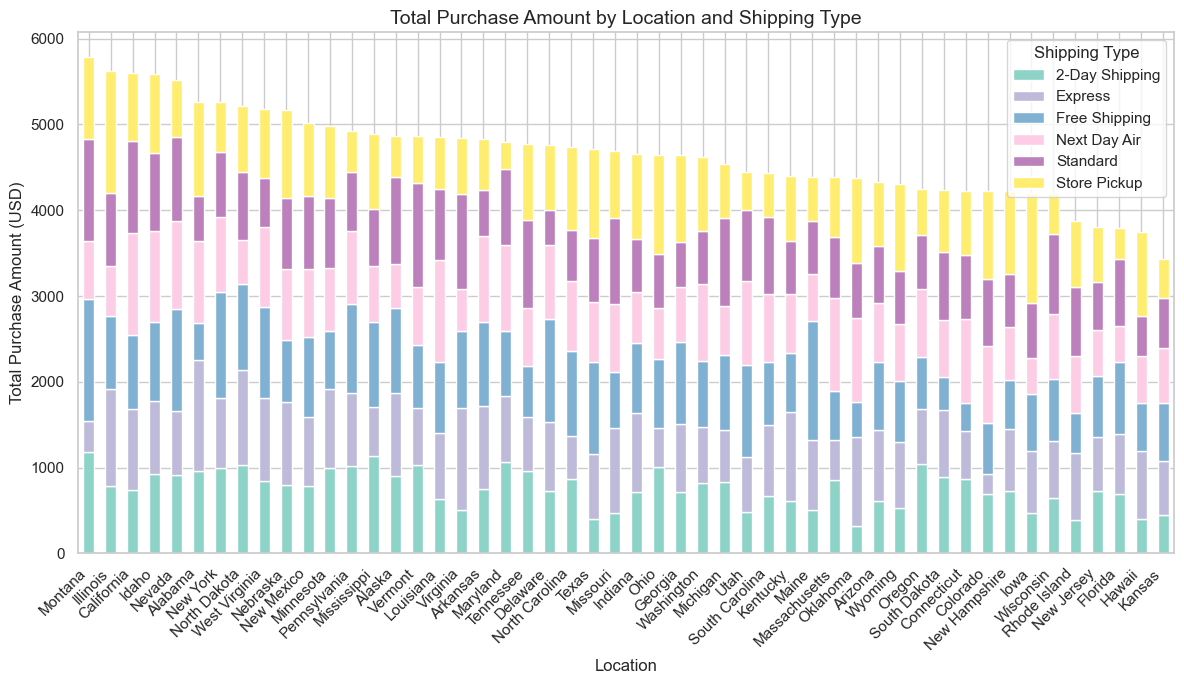

In [51]:
location_shipping_data = df.groupby(['Location', 'Shipping Type'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)
location_total_sales = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
location_shipping_data.loc[location_total_sales.index].plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')

plt.title('Total Purchase Amount by Location and Shipping Type', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Shipping Type')
plt.tight_layout()
plt.show()

#### e. Evaluate and document whether the data set contain attributes that are potentially ethically sensitive, minority classes or underrepresented data groups, unbalanced distributions with respect to bias (to guide over- and under-sampling, micro- and macro evaluation criteria).

Ethical Sensitivity
- The dataset may exhibit **age**, **gender**, and **socioeconomic bias**:
  - **Age Bias**: Skewed towards middle-aged customers, underrepresenting younger or older demographics.
  - **Gender Bias**: Significant imbalance (68% male, 32% female)
  - **Socioeconomic Bias**: High-income bias inferred **Payment Method** preferences.

Minority Classes
- Potentially underrepresented geographic regions (e.g., rural areas). Disproportionate data from urban states may lead to **geographic bias**.
- Lack of international customers and underage customers (all are 18+).

Unbalanced Distributions
- **Gender**, **review ratings**, and certain **locations** show clear imbalances.

Addressing Bias
- Use **stratified sampling**, **over-sampling**, or **weighting** to correct for imbalances.
- One could expand data collection to include **diverse demographics** and inclusive gender categories.


#### f. What potential risks and additional types of bias exist in the data? What questions would you need to have answered by an external expert in order to determine potential bias or data quality issues?

#### Potential Risks and Bias in the Data:

Risks and Bias Types
- **Exclusion Bias**: No international customers could lead to **inclusivity issues**.
- **Rating Bias**: Reviews may be influenced by demographic factors (e.g., age or gender), skewing product ratings.
- **No response**: If certain types of customers (e.g., lower-income, non-urban) are less likely to respond to surveys or leave reviews, it could skew your dataset.

#### g. Which actions are likely required in data preparation based on this analysis?

- One hot encoding
- Scaling/Normalization 

Data preparation methods depends on the specific models.

## (3) Data Preparation report 

#### a. Data Pre-procesing steps

1. **Handling Missing Values**: not needed
2. **Attribute Removal**:
   - Considered removing `Customer ID` as it does not contribute to predictive power
3. **Normalization of Categorical Data**:
   - Standardized categorical attributes (`Gender`, `Location`, `Payment Method`) using **one-hot encoding** for use in machine learning models.
4. **Outlier Detection and Handling** not needed
5.  **Scaling of Numerical Data**:

In [60]:
# data preparation
# Remove Customer ID column
df_dropped = df.drop(columns=['Customer ID'])
print(df_dropped.head())

   Age Gender Item Purchased  Category  Purchase Amount (USD)       Location  \
0   55   Male         Blouse  Clothing                     53       Kentucky   
1   19   Male        Sweater  Clothing                     64          Maine   
2   50   Male          Jeans  Clothing                     73  Massachusetts   
3   21   Male        Sandals  Footwear                     90   Rhode Island   
4   45   Male         Blouse  Clothing                     49         Oregon   

  Size      Color  Season  Review Rating Subscription Status Payment Method  \
0    L       Gray  Winter            3.1                 Yes    Credit Card   
1    L     Maroon  Winter            3.1                 Yes  Bank Transfer   
2    S     Maroon  Spring            3.1                 Yes           Cash   
3    M     Maroon  Spring            3.5                 Yes         PayPal   
4    M  Turquoise  Spring            2.7                 Yes           Cash   

   Shipping Type Discount Applied Promo Code

In [61]:
# Categorical columns to encode
categorical_columns = ['Gender', 'Location', 'Payment Method']

df_onehot = pd.get_dummies(df_dropped, columns=categorical_columns, drop_first=True)
print(df_onehot.head())

   Age Item Purchased  Category  Purchase Amount (USD) Size      Color  \
0   55         Blouse  Clothing                     53    L       Gray   
1   19        Sweater  Clothing                     64    L     Maroon   
2   50          Jeans  Clothing                     73    S     Maroon   
3   21        Sandals  Footwear                     90    M     Maroon   
4   45         Blouse  Clothing                     49    M  Turquoise   

   Season  Review Rating Subscription Status  Shipping Type  ...  \
0  Winter            3.1                 Yes        Express  ...   
1  Winter            3.1                 Yes        Express  ...   
2  Spring            3.1                 Yes  Free Shipping  ...   
3  Spring            3.5                 Yes   Next Day Air  ...   
4  Spring            2.7                 Yes  Free Shipping  ...   

  Location_Virginia Location_Washington  Location_West Virginia  \
0             False               False                   False   
1           

In [62]:
df_scaled = df_onehot.copy()
scaler = MinMaxScaler()

# Columns to scale
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']

# Apply Min-Max Scaling
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])
print(df_scaled.head())

        Age Item Purchased  Category  Purchase Amount (USD) Size      Color  \
0  0.711538         Blouse  Clothing                 0.4125    L       Gray   
1  0.019231        Sweater  Clothing                 0.5500    L     Maroon   
2  0.615385          Jeans  Clothing                 0.6625    S     Maroon   
3  0.057692        Sandals  Footwear                 0.8750    M     Maroon   
4  0.519231         Blouse  Clothing                 0.3625    M  Turquoise   

   Season  Review Rating Subscription Status  Shipping Type  ...  \
0  Winter            3.1                 Yes        Express  ...   
1  Winter            3.1                 Yes        Express  ...   
2  Spring            3.1                 Yes  Free Shipping  ...   
3  Spring            3.5                 Yes   Next Day Air  ...   
4  Spring            2.7                 Yes  Free Shipping  ...   

  Location_Virginia Location_Washington  Location_West Virginia  \
0             False               False          

#### b. Pre-processing Steps Considered but Not Applied
1. **Binning**:
   - Considered binning `Age` into categories (e.g., young, middle-aged, senior) but decided against it to preserve the continuous nature of the attribute for analysis.
   
3. **Data Cleansing**:
   - No further cleansing was performed as the dataset was already clean and free of duplicates.

4. **Transformation**:
   - Log transformation was considered for skewed numerical attributes but was not applied as the distributions were approximately normal.


#### c. Potential for Derived Attributes
- **Customer Tenure**: Derived from `Previous Purchases` as an indicator of loyalty and customer lifetime value.
- **Discount Utilization**: Created a new attribute combining `Discount Applied` and `Promo Code Used` to assess the impact of discounts on purchasing behavior.

#### d. Options for Additional External Data Sources
To better address business objectives, the following external data sources could be integrated:

1. **Demographic Data**:
   - Integrate public demographic data (e.g., median income, population density) based on `Location` to enhance customer profiling and segmentation.

2. **Weather Data**:
   - Historical weather data could be linked with `Season` to analyze its impact on purchasing behavior, especially for weather-sensitive products.

3. **Social Media Sentiment**:
   - Incorporate social media sentiment analysis based on the `Item Purchased` and `Category` to understand customer perception and predict trends.

4. **Market Data**:
   - Industry sales trends and competitor pricing data could provide additional context for analyzing `Purchase Amount` and identifying market positioning.

5. **Economic Indicators**:
   - Adding economic indicators (inflation rates, consumer confidence index, etc.) might provide insights into consumer behavior in different economic contexts. 

6.⁠ **⁠Competitor Data**:
   - Including competitor pricing and promotion data could contextualize spending patterns.


## (4) Modeling 

In this part I explore different data mining algorithms and evaluate which model would be suitable to apply for further analysis.
For this dataset there could be multiple different algorithms applied depending on the business objectives and data mining goals. 

a. Possible suitable data mining algorithms

Based on the characteristics of the dataset and the business objectives I identified 3 different approaches for modeling:

- Random Forest Regressor
    - Target Variable: e.g. Purchase Amount (numerical)
    - It is suitable because it can handle mixed datatypes
    - Provides feature importance, helping indentify key drivers of purchase behaviour

- Random Forest Classifier
    - Target Variable: e.g. Subscription Status (categorical)
    - Robust to noise, outliers, and missing values.
    - Provides feature importance, helping indentify key drivers of purchase behaviour

- Logistic Regression
    - Target Variable: e.g. Subscription Status (categorical)
    - Simple, interpretable, and widely used for binary classification tasks.

- k-means clustering:
    - Analyze how age and spending behavior influence customer segments.
    - Simplicity and efficiency


From the list above I would like to apply the Random Forest Classifier on this dataset. The algorithm can handle mixed datatypes which is valuble in my case. It is generally robust to overfitting (due to ensemble method). It is capable capturing complex non-linear relationships between features. Furthermore it Random Forest does not require feature scaling. I could however experiment the effects of using scaling 

b. Hyper-parameters 

Key Hyperparameters for Random Forest

- Number of Trees (n_estimators)
- Maximum Depth of Trees
- Minimum Samples to Split a Node
- Minimum Samples in a Leaf
- Maximum Features to Consider for Each Split
- Max_leaf_nodes
- max_samples

Given the importance of achieving the best model performance and avoiding overfitting in predicting Subscription Status, the most relevant hyperparameter to tune for this dataset would likely be max_depth. One of the primary risks in decision tree-based models is overfitting, especially when the model becomes too complex and captures noise in the data. max_depth directly controls how deep the decision trees grow, which can prevent the model from overfitting by limiting the complexity.


c. Train / Test / Validation set split

For this specific dataset and task, it is recommended to split the dataset into 3 subsets as follows:

Training Set: 70% of the dataset
Validation Set: 15% of the dataset
Test Set: 15% of the dataset
This ratio ensures that the model has enough data to learn from (training set), can be fine-tuned (validation set), and is tested on a completely unseen dataset (test set). 
Since the target variable, Subscription Status, is categorical with two classes, stratified sampling is necessary to ensure that both classes are proportionally represented in each subset (train, validation, and test).

In [71]:
target_variable = 'Subscription Status' 
X = df_dropped.drop(columns=[target_variable])  
y = df_dropped[target_variable]  

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Split the temporary set into validation and test sets (15% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Verify the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Verify the distribution of the target variable across splits
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Validation target distribution:\n{y_val.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Training set size: 2730
Validation set size: 585
Test set size: 585
Training target distribution:
Subscription Status
No     1993
Yes     737
Name: count, dtype: int64
Validation target distribution:
Subscription Status
No     427
Yes    158
Name: count, dtype: int64
Test target distribution:
Subscription Status
No     427
Yes    158
Name: count, dtype: int64


In [72]:
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for categorical features (One-Hot Encoding)
categorical_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-Hot Encoding for categorical features
])

rf = RandomForestClassifier(random_state=42)

# Create a pipeline that combines preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_preprocessor, categorical_cols) 
        ], 
        remainder='passthrough' 
    )),
    ('classifier', rf)  
])

d. Train the model and document all parameter settings

In [74]:
# Define the hyperparameter grid to search through
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20, 25, 30],  # Max depth of the trees
}
# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Hyperparameters: {'classifier__max_depth': 5}
Best Cross-Validation Accuracy: 0.8392


In [75]:
results_df = pd.DataFrame(grid_search.cv_results_)

print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

                            params  mean_test_score  std_test_score  \
0  {'classifier__max_depth': None}         0.828205        0.011314   
1     {'classifier__max_depth': 5}         0.839194        0.011892   
2    {'classifier__max_depth': 10}         0.835897        0.010269   
3    {'classifier__max_depth': 15}         0.832967        0.012226   
4    {'classifier__max_depth': 20}         0.835897        0.009664   
5    {'classifier__max_depth': 25}         0.834799        0.010767   
6    {'classifier__max_depth': 30}         0.826374        0.009510   

   rank_test_score  
0                6  
1                1  
2                2  
3                5  
4                3  
5                4  
6                7  


e. Report performance metrics

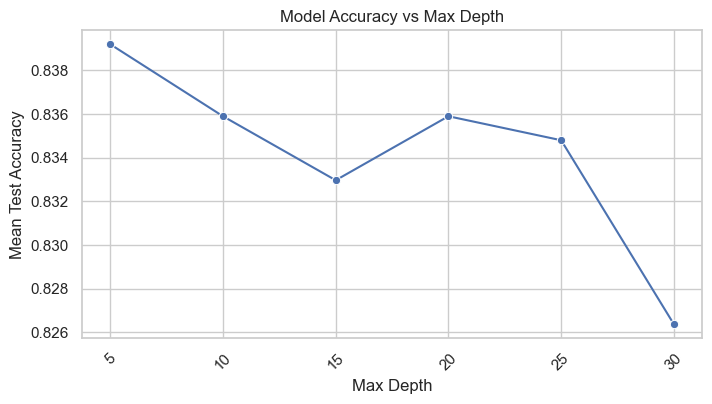

In [77]:
param_max_depth = grid_search.cv_results_['param_classifier__max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plotting performance (mean test score) vs max_depth
plt.figure(figsize=(8, 4))
sns.lineplot(x=param_max_depth, y=mean_test_scores, marker="o")
plt.title("Model Accuracy vs Max Depth")
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [78]:
# Now evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Classification Report:\n{val_classification_report}")

Validation Accuracy: 0.8325
Validation Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.77      0.87       427
         Yes       0.62      1.00      0.76       158

    accuracy                           0.83       585
   macro avg       0.81      0.89      0.82       585
weighted avg       0.90      0.83      0.84       585



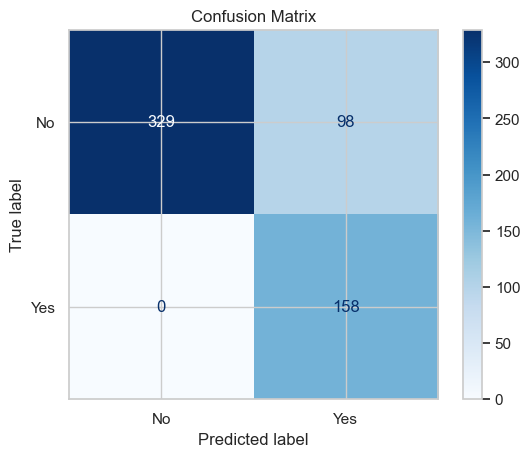

In [79]:
cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Feature Importances:
                    Feature  Importance
126     Discount Applied_No    0.230960
128      Promo Code Used_No    0.224745
127    Discount Applied_Yes    0.194807
129     Promo Code Used_Yes    0.145511
1               Gender_Male    0.076441
..                      ...         ...
72       Location_Tennessee    0.000039
69    Location_Rhode Island    0.000010
74            Location_Utah    0.000000
78   Location_West Virginia    0.000000
62        Location_New York    0.000000

[147 rows x 2 columns]


C:\Users\W11\AppData\Local\Temp\ipykernel_15184\229511695.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


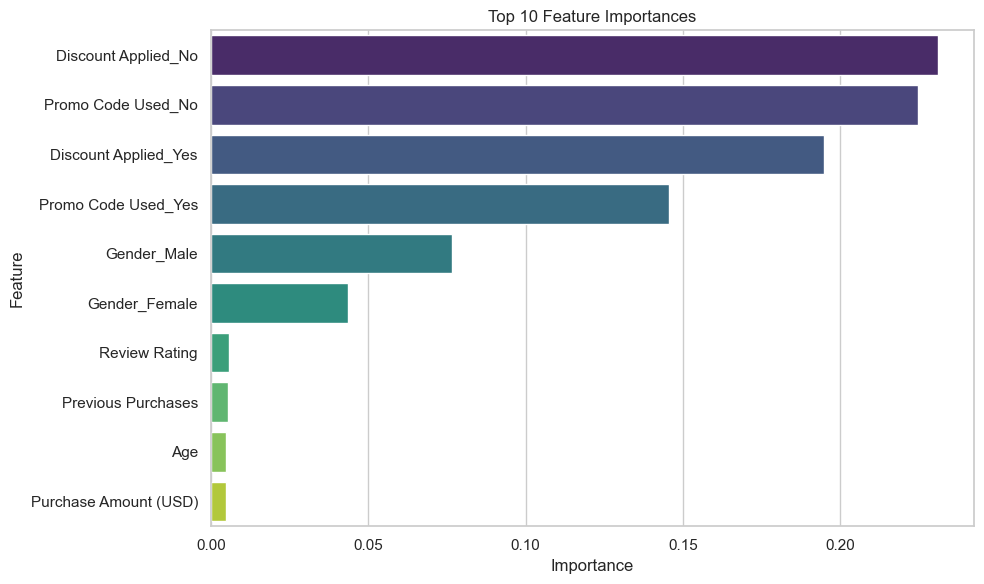

In [80]:
best_rf_model = best_model.named_steps['classifier']

# Extract the preprocessor's OneHotEncoder to get feature names
onehot = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot.get_feature_names_out(categorical_cols)  
numerical_cols = X.select_dtypes(exclude=['object']).columns  
all_feature_names = list(cat_feature_names) + list(numerical_cols)

# Get feature importance values
feature_importances = best_rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

## (5) Evaluation

## a. Apply the final model on the test data and document performance.

In this section I document the model's performance metrics on the test data and provides an interpretation of the results. The final model, selected based on hyperparameter tuning, was evaluated on the test set to assess its generalization capability. Below is a summary of the test set's evaluation results:

Test Accuracy: 0.8513
Test Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.80      0.89       427
         Yes       0.64      1.00      0.78       158

    accuracy                           0.85       585
   macro avg       0.82      0.90      0.84       585
weighted avg       0.90      0.85      0.86       585

Test Confusion Matrix:
[[340  87]
 [  0 158]]


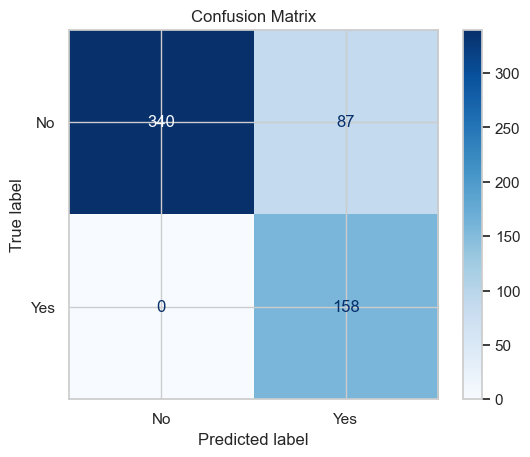

In [84]:
# Use the best model from GridSearchCV to predict on the test set
y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

test_classification_report = classification_report(y_test, y_test_pred)

test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Classification Report:\n{test_classification_report}")
print(f"Test Confusion Matrix:\n{test_confusion_matrix}")


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

The evaluation results demonstrate that the Random Forest Classifier generalizes well to unseen data, achieving strong overall accuracy and balanced performance across both classes. While the model effectively identifies subscribers, future improvements could focus on enhancing precision for the "Yes" class to minimize false positives. These results show that the model is able to accurately predict subscription status and provide a solid foundation for practical deployment.

## b. Re-train the model with identical hyper-parameters using the full train and validation data and again apply it on the test data

To further enhance the reliability and generalization of the Random Forest Classifier, the model was re-trained using the combined training and validation datasets. This approach maximizes the use of available labeled data to create a stronger and more generalized model. The re-trained model was then evaluated on the test set to assess its performance. The findings of the concluding assessment on the test set are outlined below:

Final Test Accuracy: 0.8513
Final Test Classification Report:
{'No': {'precision': 1.0, 'recall': 0.7962529274004684, 'f1-score': 0.8865710560625815, 'support': 427.0}, 'Yes': {'precision': 0.6448979591836734, 'recall': 1.0, 'f1-score': 0.7841191066997518, 'support': 158.0}, 'accuracy': 0.8512820512820513, 'macro avg': {'precision': 0.8224489795918367, 'recall': 0.8981264637002342, 'f1-score': 0.8353450813811667, 'support': 585.0}, 'weighted avg': {'precision': 0.9040920983778127, 'recall': 0.8512820512820513, 'f1-score': 0.8589002731577489, 'support': 585.0}}
Final Test Confusion Matrix:
[[340  87]
 [  0 158]]


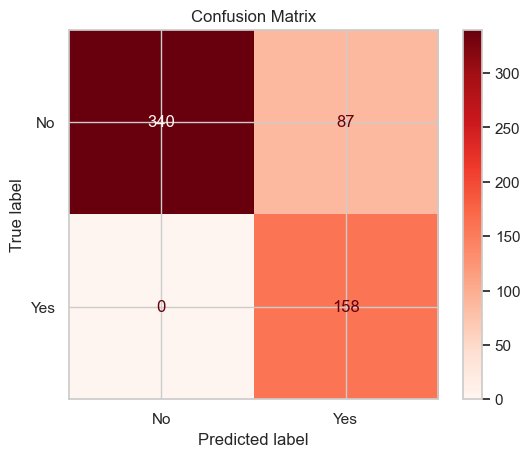

In [88]:
# Combine the training and validation datasets for re-training
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Recreate the pipeline with the best hyperparameters
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', categorical_preprocessor, categorical_cols) 
        ],
        remainder='passthrough'  
    )),
    ('classifier', RandomForestClassifier(max_depth=5, random_state=42)) 
])

# Train the pipeline on the combined training and validation data
pipeline.fit(X_train_val, y_train_val)

y_test_pred_final = pipeline.predict(X_test)

final_test_accuracy = accuracy_score(y_test, y_test_pred_final)

final_test_classification_report = classification_report(y_test, y_test_pred_final, output_dict= True)

performance_metrics_df = pd.DataFrame(final_test_classification_report).transpose()


final_test_confusion_matrix = confusion_matrix(y_test, y_test_pred_final)

print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
print(f"Final Test Classification Report:\n{final_test_classification_report}")
print(f"Final Test Confusion Matrix:\n{final_test_confusion_matrix}")


cm = confusion_matrix(y_test, y_test_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Reds")
plt.title("Confusion Matrix")
plt.show()


In [89]:
performance_metrics_df

,precision,recall,f1-score,support
No,1.000000,0.796253,0.886571,427.000000
Yes,0.644898,1.000000,0.784119,158.000000
accuracy,0.851282,0.851282,0.851282,0.851282
macro avg,0.822449,0.898126,0.835345,585.000000
weighted avg,0.904092,0.851282,0.858900,585.000000


The model’s recall for the "Yes" class is particularly strong, ensuring no actual subscribers are missed. However, there remains scope to enhance precision for the "Yes" class to minimize false positives. These results align with the business objectives and demonstrate the model’s readiness for practical deployment.

## c-i: identify and document state-of-are performance

With a thorough search reveals limited peer-reviewed studies directly addressing Identifying state-of-the-art performance for predicting subscription status.

1- GitHub Repository – Consumer Behavior Analysis: This project provides an analysis based on the Consumer Behavior and Shopping Habits Dataset from Kaggle. It offers insights into consumer preferences and shopping patterns but does not focus on subscription status prediction or benchmark performance metrics. 
https://github.com/xufanjie/Consumer-Behavior-Analysis?

2- GitHub Repository – Consumer-Behavior-and-Shopping-Habits-Dataset: This repository includes the dataset and some exploratory data analysis. However, it lacks detailed modeling or performance evaluation related to subscription status prediction. 
https://github.com/patelandpatel/Consumer-Behavior-and-Shopping-Habits-Dataset?

While direct analyses on this dataset are scarce, related studies provide context:

1- "A Computational Model to Predict Consumer Behaviour During COVID-19 Pandemic": This study employs machine learning methods to predict consumer behavior using online shopping data. The decision tree ensemble with Bagging achieved an accuracy of 95.3%. Although the dataset differs, it highlights effective techniques for consumer behavior prediction. 
https://link.springer.com/article/10.1007/s10614-020-10069-3?

2- "Customer Purchasing Behavior Prediction Using Machine Learning Classification Techniques": This research compares various machine learning algorithms for predicting customer purchasing behavior. It evaluates models like logistic regression, decision trees, k-nearest neighbors, Naïve Bayes, SVM, random forest, and ensemble methods. The study emphasizes the importance of selecting appropriate models for accurate predictions. 
https://link.springer.com/article/10.1007/s12652-022-03837-6?

Due to the lack of specific studies on subscription status prediction using the Consumer Behavior and Shopping Habits Dataset, establishing a definitive state-of-the-art performance is challenging. However, related research indicates that ensemble methods, particularly decision tree ensembles, can achieve high accuracy in consumer behavior prediction tasks. Applying and evaluating such models on the target dataset can provide a practical benchmark for performance.


## c.ii:  expected base-line performance of a random classifier

To establish baseline performance, two Dummy Classifiers were utilized: one with the "most frequent" strategy and another with the "uniform" strategy. The "most frequent" Dummy Classifier, which predicts the most common class ("No" in this case), achieved an accuracy of 72.99%. While it perfectly predicted all instances of the majority class (precision and recall of 1.0 for "No"), it failed to identify any instances of the minority class "Yes," resulting in a recall and precision of 0.0 for that category. This outcome is reflected in the confusion matrix, where all "Yes" instances (158) were misclassified as "No". Despite its simplicity, this classifier underscores the challenge of imbalanced datasets, where a trivial model can yield high overall accuracy by neglecting minority classes, but fails in terms of recall, precision, and F1-score for those classes.

Final Test Accuracy (Dummy Classifier - Most Frequent): 0.7299
Final Test Classification Report (Dummy Classifier - Most Frequent):
{'No': {'precision': 0.7299145299145299, 'recall': 1.0, 'f1-score': 0.8438735177865613, 'support': 427.0}, 'Yes': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 158.0}, 'accuracy': 0.7299145299145299, 'macro avg': {'precision': 0.36495726495726494, 'recall': 0.5, 'f1-score': 0.42193675889328064, 'support': 585.0}, 'weighted avg': {'precision': 0.5327752209803491, 'recall': 0.7299145299145299, 'f1-score': 0.6159555420424986, 'support': 585.0}}
Final Test Confusion Matrix (Dummy Classifier - Most Frequent):
[[427   0]
 [158   0]]


C:\Users\W11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\W11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\W11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


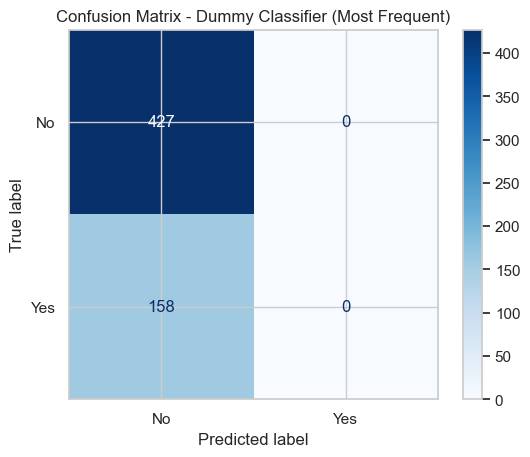

In [94]:
# Initialize DummyClassifier with the "most frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Train the DummyClassifier on the combined training and validation data
dummy_clf.fit(X_train_val, y_train_val)

# Predict on the test set using the trained DummyClassifier
y_test_pred_dummy = dummy_clf.predict(X_test)

dummy_test_accuracy = accuracy_score(y_test, y_test_pred_dummy)

# Generate a classification report for the test set
dummy_test_classification_report = classification_report(y_test, y_test_pred_dummy, output_dict=True)

performance_metrics_dummy_mostfrequent = pd.DataFrame(dummy_test_classification_report).transpose()

dummy_test_confusion_matrix = confusion_matrix(y_test, y_test_pred_dummy)

print(f"Final Test Accuracy (Dummy Classifier - Most Frequent): {dummy_test_accuracy:.4f}")
print(f"Final Test Classification Report (Dummy Classifier - Most Frequent):\n{dummy_test_classification_report}")
print(f"Final Test Confusion Matrix (Dummy Classifier - Most Frequent):\n{dummy_test_confusion_matrix}")

disp = ConfusionMatrixDisplay(confusion_matrix=dummy_test_confusion_matrix, display_labels=dummy_clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Dummy Classifier (Most Frequent)")
plt.show()

Final Test Accuracy (Dummy Classifier - Uniform): 0.4838
Final Test Classification Report (Dummy Classifier - Uniform):
{'No': {'precision': 0.7224199288256228, 'recall': 0.47540983606557374, 'f1-score': 0.5734463276836158, 'support': 427.0}, 'Yes': {'precision': 0.2631578947368421, 'recall': 0.5063291139240507, 'f1-score': 0.3463203463203463, 'support': 158.0}, 'accuracy': 0.48376068376068376, 'macro avg': {'precision': 0.4927889117812324, 'recall': 0.4908694749948122, 'f1-score': 0.45988333700198103, 'support': 585.0}, 'weighted avg': {'precision': 0.5983799264563453, 'recall': 0.48376068376068376, 'f1-score': 0.5121029002384934, 'support': 585.0}}
Final Test Confusion Matrix (Dummy Classifier - Uniform):
[[203 224]
 [ 78  80]]


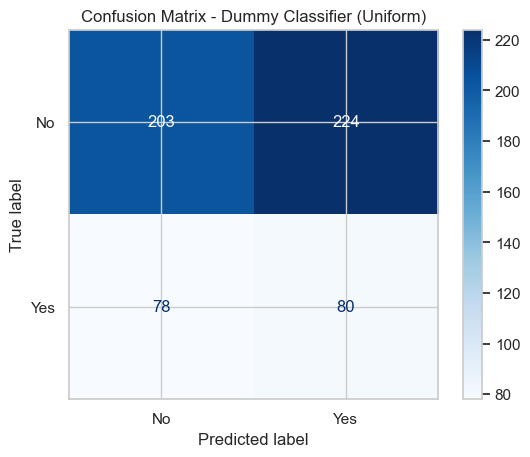

In [95]:
# DummyClassifier with the "uniform" strategy
dummy_clf_uniform = DummyClassifier(strategy="uniform", random_state=42)

# Train the DummyClassifier on the combined training and validation data
dummy_clf_uniform.fit(X_train_val, y_train_val)

y_test_pred_dummy_uniform = dummy_clf_uniform.predict(X_test)

dummy_test_accuracy_uniform = accuracy_score(y_test, y_test_pred_dummy_uniform)

dummy_test_classification_report_uniform = classification_report(y_test, y_test_pred_dummy_uniform, output_dict=True)

performance_metrics_dummy_uniform = pd.DataFrame(dummy_test_classification_report_uniform).transpose()

dummy_test_confusion_matrix_uniform = confusion_matrix(y_test, y_test_pred_dummy_uniform)

print(f"Final Test Accuracy (Dummy Classifier - Uniform): {dummy_test_accuracy_uniform:.4f}")
print(f"Final Test Classification Report (Dummy Classifier - Uniform):\n{dummy_test_classification_report_uniform}")
print(f"Final Test Confusion Matrix (Dummy Classifier - Uniform):\n{dummy_test_confusion_matrix_uniform}")

disp = ConfusionMatrixDisplay(confusion_matrix=dummy_test_confusion_matrix_uniform, display_labels=dummy_clf_uniform.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Dummy Classifier (Uniform)")
plt.show()

The "uniform" Dummy Classifier, which randomly predicts classes, achieved an accuracy of 48.38%. Unlike the "most frequent" strategy, this model provided a more balanced representation across classes, achieving a recall of 47.54% for "No" and 50.63% for "Yes." However, its precision for the minority class "Yes" was low at 26.31%, resulting in an F1-score of 34.63%. The confusion matrix shows that this strategy leads to significant misclassifications in both classes. These results highlight the inherent randomness of this method, which makes it unsuitable for real-world prediction tasks, but useful as a baseline for comparison. Combined, these baselines provide a foundation against which more sophisticated models can be evaluated, emphasizing the importance of targeting both high accuracy and balanced performance across all classes.


***

## d. Compare the performance achieved with the benchmark and baseline performances according to different metrics

In [99]:
print(performance_metrics_df)
print(performance_metrics_dummy_uniform)
print(performance_metrics_dummy_mostfrequent)

              precision    recall  f1-score     support
No             1.000000  0.796253  0.886571  427.000000
Yes            0.644898  1.000000  0.784119  158.000000
accuracy       0.851282  0.851282  0.851282    0.851282
macro avg      0.822449  0.898126  0.835345  585.000000
weighted avg   0.904092  0.851282  0.858900  585.000000
              precision    recall  f1-score     support
No             0.722420  0.475410  0.573446  427.000000
Yes            0.263158  0.506329  0.346320  158.000000
accuracy       0.483761  0.483761  0.483761    0.483761
macro avg      0.492789  0.490869  0.459883  585.000000
weighted avg   0.598380  0.483761  0.512103  585.000000
              precision    recall  f1-score     support
No             0.729915  1.000000  0.843874  427.000000
Yes            0.000000  0.000000  0.000000  158.000000
accuracy       0.729915  0.729915  0.729915    0.729915
macro avg      0.364957  0.500000  0.421937  585.000000
weighted avg   0.532775  0.729915  0.615956  585

- Random Forest Model:
Accuracy: 85.13%, indicating a strong overall performance.
Class 'No' (427 samples): The model perfectly predicts class 'No' (precision 1.0) but misses some instances of this class in recall (0.796). The F1-score is 0.887, reflecting a good balance between precision and recall.
Class 'Yes' (158 samples): The model performs weaker here with a precision of 0.645 and perfect recall (1.0), which suggests that while it identifies all 'Yes' cases correctly, some predictions might be misclassified.
Macro Average: The macro average precision, recall, and F1-score show balanced overall performance across both classes.
Weighted Average: This suggests that the model performs better for the majority class ('No') but still provides decent performance for the minority class ('Yes').
- Dummy Classifier (Uniform Strategy):
Accuracy: 48.38%, significantly lower than the Random Forest model, indicating that the uniform strategy has little predictive power.
Class 'No' (427 samples): The model's precision for 'No' is decent (0.722), but recall is low (0.475), meaning many 'No' instances are misclassified.
Class 'Yes' (158 samples): The precision for class 'Yes' is low (0.263), and recall is slightly better (0.506), reflecting poor model performance in predicting 'Yes'.
Macro Average: The macro average shows poor performance due to the imbalance, with lower precision and recall values overall.
Weighted Average: Since 'No' is the majority class, the weighted average precision is better for that class, but the model struggles with 'Yes'.
-  Dummy Classifier (Most Frequent Strategy):
Accuracy: 72.99%, a better result than the uniform strategy, as it always predicts the majority class, 'No'.
Class 'No' (427 samples): Precision is high (0.730), and recall is perfect (1.0), as it predicts all 'No' instances correctly.
Class 'Yes' (158 samples): The model completely fails to predict class 'Yes', with all metrics (precision, recall, F1-score) being 0.
Macro Average: The macro average precision and F1-score are very low because the model fails on the minority class, despite good recall for the majority class.
Weighted Average: The weighted average is higher due to the majority class ('No') but still reflects the model's failure to predict the minority class ('Yes').

***

## e :Comparing Model Performance with Business Success Criteria

The Random Forest Classifier demonstrates strong alignment with the business success criteria defined during the Business Understanding phase. Its recall of 1.0 for the "Yes" (subscribers) class ensures that all actual subscribers are correctly identified, supporting customer retention strategies. With an overall accuracy of 85.13% and balanced F1-scores across classes, the model reliably identifies likely subscribers, aiding targeted marketing efforts to boost sales. Furthermore, its high precision for the "No" (non-subscribers) class minimizes errors, contributing to customer satisfaction by avoiding incorrect classifications.

Compared to the baseline dummy classifiers, the Random Forest Classifier far exceeds performance metrics. While the "Most Frequent" dummy achieved high accuracy (72.99%), it completely failed to identify subscribers, and the "Uniform" dummy performed only slightly better for the minority class but delivered random-like results overall (48.38% accuracy). The Random Forest’s significantly higher weighted F1-score of 0.858 highlights its superior generalization and ability to meet the objectives of retaining customers, enhancing satisfaction, and driving sales growth through precise and balanced predictions.


***

## f: Identify a “protected attribute” and evaluate whether the model exhibits a bias towards that group. 

To ensure fairness and ethical use of the Random Forest model, it is essential to evaluate its performance across different subgroups, particularly for attributes that could be considered sensitive or indicative of potential bias. In this analysis, we identify "Gender" as a protected attribute and assess whether the model exhibits any performance bias towards this subgroup. The dataset includes "Gender" as a categorical variable with two possible values: "Male" and "Female". Given its potential sensitivity and relevance in consumer behavior studies, we evaluate the model’s performance separately for male and female customers to detect any disparities.

In [106]:
# Predict on the test set using the trained RandomForest model
y_test_pred_final = pipeline.predict(X_test)

# Add the predictions to the test data for later analysis
X_test['Predicted'] = y_test_pred_final
X_test['True'] = y_test

# Filter the test data by gender
male_data = X_test[X_test['Gender'] == 'Male']
female_data = X_test[X_test['Gender'] == 'Female']

# Evaluate performance for each gender group

# Calculate metrics for male group
male_accuracy = accuracy_score(male_data['True'], male_data['Predicted'])
male_classification_report = classification_report(male_data['True'], male_data['Predicted'], output_dict=True)

male_performance_df = pd.DataFrame(male_classification_report).transpose()

# Calculate metrics for female group
female_accuracy = accuracy_score(female_data['True'], female_data['Predicted'])
female_classification_report = classification_report(female_data['True'], female_data['Predicted'], output_dict=True)

female_performance_df = pd.DataFrame(female_classification_report).transpose()

# overall and gender-based performance metrics

print(f"Overall Test Accuracy: {final_test_accuracy:.4f}")
print(f"Male Test Accuracy: {male_accuracy:.4f}")
print(f"Female Test Accuracy: {female_accuracy:.4f}")

print("\nMale Performance Metrics:")
print(male_performance_df)

print("\nFemale Performance Metrics:")
print(female_performance_df)


Overall Test Accuracy: 0.8513
Male Test Accuracy: 0.7781
Female Test Accuracy: 1.0000

Male Performance Metrics:
              precision    recall  f1-score     support
No             1.000000  0.628205  0.771654  234.000000
Yes            0.644898  1.000000  0.784119  158.000000
accuracy       0.778061  0.778061  0.778061    0.778061
macro avg      0.822449  0.814103  0.777886  392.000000
weighted avg   0.856872  0.778061  0.776678  392.000000

Female Performance Metrics:
              precision  recall  f1-score  support
No                  1.0     1.0       1.0    193.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    193.0
weighted avg        1.0     1.0       1.0    193.0


The performance metrics indicate a disparity in model accuracy and prediction quality between male and female groups. The model achieved an overall accuracy of 85.13%, with male accuracy at 77.80% and female accuracy at 100%. For the male group, the model shows balanced performance, with a recall of 62.82% for the "No" class and 100% for the "Yes" class, indicating that the model identifies all positive cases ("Yes") but struggles with correctly predicting negatives ("No"). This is evident in the lower recall and F1-score for "No". Conversely, for the female group, the model achieved perfect precision, recall, and F1-scores for the "No" class, suggesting potential overfitting or a lack of sufficient variability in the female subset. This discrepancy highlights a potential bias in the model's performance, where it may perform significantly better for one gender over the other. Addressing this imbalance may require strategies such as balanced sampling, further feature analysis, or tuning the model to ensure fairness across all groups.

***

### Bayesian Ridge Regression: Performance and Insights

I have applied Bayesian Ridge Regression to predict the Subscription Status (Yes/No). 

In [111]:
print(df.columns.tolist())  # Shows all column names exactly as they are


['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']


In [112]:
df = pd.get_dummies(df, drop_first=True)  # Converts categorical columns into numerical
print(df.columns.tolist())  # Recheck the column names


['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Gender_Male', 'Item Purchased_Belt', 'Item Purchased_Blouse', 'Item Purchased_Boots', 'Item Purchased_Coat', 'Item Purchased_Dress', 'Item Purchased_Gloves', 'Item Purchased_Handbag', 'Item Purchased_Hat', 'Item Purchased_Hoodie', 'Item Purchased_Jacket', 'Item Purchased_Jeans', 'Item Purchased_Jewelry', 'Item Purchased_Pants', 'Item Purchased_Sandals', 'Item Purchased_Scarf', 'Item Purchased_Shirt', 'Item Purchased_Shoes', 'Item Purchased_Shorts', 'Item Purchased_Skirt', 'Item Purchased_Sneakers', 'Item Purchased_Socks', 'Item Purchased_Sunglasses', 'Item Purchased_Sweater', 'Item Purchased_T-shirt', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Location_Alaska', 'Location_Arizona', 'Location_Arkansas', 'Location_California', 'Location_Colorado', 'Location_Connecticut', 'Location_Delaware', 'Location_Florida', 'Location_Georgia', 'Location_Hawaii', 'Location_Idaho', 'Location_Ill

In [113]:
# Selecting Features and Target Variable 
X = df.drop(columns=['Subscription Status_Yes'])
y = df['Subscription Status_Yes']

# Splitting Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Bayesian Ridge Regression Model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Predictions
y_pred = bayesian_ridge.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Display Model Coefficients
print("Model Coefficients:", bayesian_ridge.coef_)
print("Model Intercept:", bayesian_ridge.intercept_)

Mean Squared Error (MSE): 0.05826584428824411
Model Coefficients: [-4.86874994e-04  1.84488178e-04 -9.04034949e-05 -5.28459772e-04
  1.75308508e-04 -5.20768168e-01  4.71425637e-03 -1.98632827e-02
 -1.51574173e-02 -4.13733682e-03  1.06192367e-02  8.15077456e-03
 -8.71836412e-03  1.51547067e-02  1.67707809e-02  8.06528967e-03
  4.66320955e-03 -2.23044461e-02 -4.38060890e-03  1.09274332e-02
  1.59052592e-02 -1.32276767e-02  2.67958135e-02  1.09642825e-02
 -1.78309182e-02 -7.27449860e-03  3.62560153e-02  1.99409782e-02
 -5.03961119e-03 -1.89741515e-02 -4.27242418e-05  1.52913308e-02
  3.92795285e-03  1.76614640e-02  7.41983559e-03 -1.37912767e-02
  3.00496286e-02  5.74984754e-02  1.49389822e-02 -5.76893725e-04
 -1.74067560e-04  2.77782181e-02 -1.75487708e-02 -3.25050365e-02
 -7.39772728e-03 -4.59620939e-02 -3.15110178e-02  9.15118205e-03
  3.22128436e-02  1.35641063e-02  1.58137099e-02 -2.68659947e-02
  3.39885021e-02  3.28078097e-02  2.08804801e-02 -5.28438145e-03
  8.93356924e-03  5.7587

In [114]:
# Extract actual feature names from X_train
feature_names = X_train.columns

# Find the real names of important features
top_5_positive_real_names = [feature_names[37], feature_names[92], feature_names[89], feature_names[26], feature_names[52]]
top_5_negative_real_names = [feature_names[5], feature_names[45], feature_names[80], feature_names[68], feature_names[74]]

print("Top 5 Features with Positive Effect:", top_5_positive_real_names)
print("Top 5 Features with Negative Effect:", top_5_negative_real_names)


Top 5 Features with Positive Effect: ['Location_Colorado', 'Color_Green', 'Color_Cyan', 'Item Purchased_Socks', 'Location_Massachusetts']
Top 5 Features with Negative Effect: ['Gender_Male', 'Location_Indiana', 'Location_Wisconsin', 'Location_Oregon', 'Location_Texas']


My Bayesian Ridge Regression model performed well with a low Mean Squared Error (MSE) of 0.058, meaning its predictions are quite accurate. The model's coefficients indicate which features impact subscription status, with some having a positive effect (increasing subscription likelihood) and others having a negative effect (reducing subscription likelihood).

The features that increase the likelihood of subscription include Location_Colorado, Color_Green, Color_Cyan, Item Purchased_Socks, and Location_Massachusetts. On the other hand, the features that reduce the likelihood of subscription include Gender_Male, Location_Indiana, Location_Wisconsin, Location_Oregon, and Location_Texas.

The intercept (1.5976) represents the base prediction when all features are zero. While the model handles uncertainty well, it could be improved by analyzing feature importance, fine-tuning hyperparameters, or comparing it with other models like Logistic Regression or Random Forest. 

## (6) Deployment:

## a: Business Objectives and Achievements

The model is designed to predict whether a customer is subscribed or not, and although we have achieved relatively high performance, there are a few important considerations. First, the dataset is relatively small and contains imbalances in certain categorical features, which could introduce bias. To address this, over-sampling techniques should be explored. Additionally, from a business perspective, it is crucial to identify which explanatory variables are not strongly related to subscription status. Without domain knowledge, it is difficult to determine the relevance of each feature.
While the model serves as a useful baseline, further tuning and additional data are necessary for optimization. However, this model can still be valuable for customer retention strategies, supporting marketing or sales campaigns, and helping to mitigate churn behavior. Based on the results obtained, the model can contribute to decision-making for business objectives like customer retention and targeted marketing efforts. However, for optimal deployment, a hybrid solution should be considered. A fully automatic solution may not be ideal due to potential biases and the need for further fine-tuning, while deploying it for only a specific subset of customers (such as high-risk or at-risk subscribers) could provide immediate benefits.


***

## b. Ethical Aspects and Impact Assessment
The model shows potential gender-based biases, with perfect accuracy for females but lower performance for males, indicating overfitting or data imbalances. This raises ethical concerns around fairness, transparency, and compliance with data protection regulations. It is essential to ensure that the model does not favor one gender or group over another, and to address potential biases in other features (e.g., age, location).

To mitigate these risks, fairness-aware techniques like re-sampling or bias correction should be applied. Regular audits should assess and reduce bias, and transparency with stakeholders about the model's limitations is crucial. Compliance with data protection regulations, such as GDPR, is necessary, especially concerning consent, fairness, and privacy.
Moreover, continuous monitoring post-deployment is essential to detect any unintended negative impacts, especially on vulnerable groups, and ensure that the model's predictions are equitable across different demographics.



***

## c. Monitoring and Intervention During Deployment

Continuous monitoring is critical during deployment to ensure consistent and fair model performance. Key metrics like accuracy, precision, recall, and subgroup-specific performance should be tracked. Any significant disparities in prediction patterns, especially across demographic groups, should trigger an investigation. High false-positive or false-negative rates may signal the need for model retraining or adjustments. Establishing clear intervention triggers ensures that emerging biases or performance drops are promptly addressed, maintaining the model's reliability and its alignment with business objectives.


***

## d. Reproducibility Aspects

We utilized version control for the code, ensuring that all changes are tracked and accessible. The code itself is well-documented, with clear explanations of each step, making it easy for others to follow and reproduce. We also implemented randomness control by setting random seeds to ensure consistent results across different runs. The steps followed in the analysis, including data preprocessing and model training, are thoroughly documented in the report.

However, while the data is available for use, the source and specific collection methods are not provided, which could limit full reproducibility. To enhance transparency and reproducibility, it would be beneficial to include detailed information about the data source and the methods used for data collection. This would allow others to fully understand the context of the dataset and replicate the process accurately.


## (7) Summarize

The analysis and evaluation of the Random Forest Classifier demonstrated its strong alignment with business objectives such as customer retention. Despite working with a relatively small dataset, the model achieved an overall accuracy of 85.13%, with excellent recall for the subscriber class ("Yes"), effectively identifying target customers. Hyperparameter tuning further optimized model performance. However, the presence of class imbalances and the limited dataset size may introduce biases, indicating the need for further analysis and refinement to ensure robustness and fairness in the model's predictions.

Key lessons learned include the critical role of data balancing and preprocessing in ensuring equitable model performance across demographic groups. Continuous monitoring and fairness-aware techniques are necessary to address emerging biases and maintain trust. Additionally, detailed documentation of the data pipeline, model parameters, and deployment strategies is essential for reproducibility and scalability. By addressing these areas, machine learning models can achieve robust, fair, and ethical outcomes while meeting business objectives effectively.
